                            PCA: Análise de Componentes Principais
-> O PCA é um algoritmo de redução de dimensionalidade. Seu principal objetivo
é simplificar um dataset complexo, com muitas variáveis (colunas), transformando-o em um novo conjunto de dados com menos variáveis, mas que ainda mantenha a maior parte da informação original.
                           
                        O conceito chave: Componentes Principais
-> Em vez de simplesmente descartar as colunas o PCA as transforma.

    1. Redirecionamento do Eixo: O PCA encontra as direções (eixos) no espaço de dados onde a variância (dispersão) dos dados é máxima.

    2. Componentes Principais: Essas novas direções são chamadas de componentes principais (PCs).

        * O PC1 (Primeiro Componente Principal) sempre captura a maior variância dos dados

        * O PC2 captura a maior variância restante, e assim por diante.
    
    3. Redução: Ao selecionar apenas os primeiros componentes (por exemplo, PC1 e PC2), você reduz a dimensionalidade drasticamente, retendo 90% ou mais da 
    informação do dataset original.

                    Por que o PCA é essencial no Machine Learning?
-> O pca é usado para resolver 2 grandes problemas:

    1. Melhora da Performance (velocidade): Reduzir o número de features torna o treinamento dos modelos (como Regressão, Classificação ou até Clustering)muito mais rápido.

    2. Combate a Maldição da Dimensionalidade: Em datasets com muitas features, a dispersão dos dados aumenta tanto que os algoritmos de Machine Learning se
    tornam ineficientes, um problema conhecido como "Maldição da Dimensionalidade". O PCA mitiga isso.

    3. Visualização: É impossivel visualizar dados com 100 dimensões. O PCA permite projetar esses dados em 2 ou 3 componentes principais, tornando a visualização de padrões (como clusters) possivel


                        CLASSIFICADOR SEM PCA (STELLAR)

Import das bibliotecas necesssárias 

In [1]:
import pandas as pd

import numpy as np

import time

Acessando a base de dados stellar

In [2]:
base_de_dados_stellar = pd.read_csv('Dados/star_classification.csv')

In [3]:
x = base_de_dados_stellar.loc[:, base_de_dados_stellar.columns != 'class'].values

y = base_de_dados_stellar["class"].values

len(base_de_dados_stellar.columns)

18

In [4]:
np.unique(y, return_counts=True)

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([59445, 18961, 21594]))

In [5]:
base_de_dados_stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
from sklearn.preprocessing import LabelEncoder

labelecoder_y = LabelEncoder()

y = labelecoder_y.fit_transform(y)

In [7]:
from sklearn.preprocessing import StandardScaler

escala = StandardScaler()

x = escala.fit_transform(x.astype(float))

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

modelo = LogisticRegression(solver='lbfgs', max_iter=400)

tempo_inicial = time.perf_counter()

modelo.fit(xtrain, ytrain)

tempo_final = time.perf_counter()

print("Tempo de treino: ", tempo_final - tempo_inicial)

Tempo de treino:  4.759835599994403


In [9]:
modelo.score(xtest, ytest)

0.9566666666666667

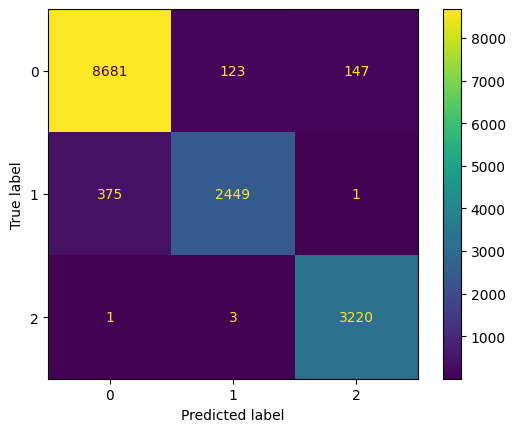

In [10]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(modelo, xtest, ytest)

plt.show()

                        CLASSIFICADOR COM PCA (STELLAR)

In [11]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)

xtrain = pca.fit_transform(xtrain)

xtest = pca.transform(xtest)

In [12]:
modelo = LogisticRegression(solver='lbfgs', max_iter=400)

tempo_inicial = time.perf_counter()

modelo.fit(xtrain, ytrain)

tempo_final = time.perf_counter()

print("Tempo de treino: ", tempo_final - tempo_inicial)

Tempo de treino:  1.6927952999976696


In [13]:
modelo.score(xtest, ytest)

0.9492

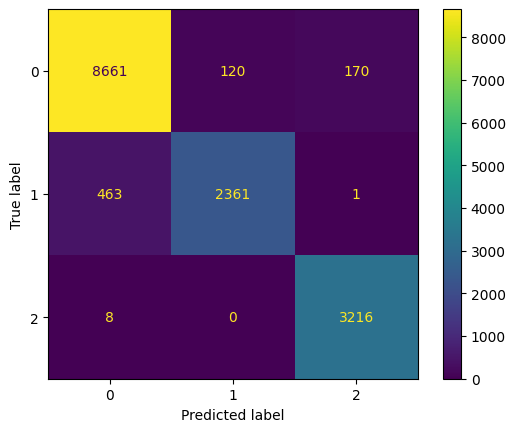

In [14]:
ConfusionMatrixDisplay.from_estimator(modelo, xtest, ytest)

plt.show()

                          VISUALIZAÇÃO PCA

In [15]:
from sklearn.decomposition import PCA

pca_view = PCA(n_components=2)

principal_componente = pca_view.fit_transform(xtrain)

print(pca_view.explained_variance_ratio_)

[0.28583469 0.21243622]


In [16]:
principal_componente_df = pd.DataFrame(data=principal_componente, columns=['principal component 1', 'principal component 2'])

In [17]:
principal_componente_df

,principal component 1,principal component 2
0,1.474797,-0.122726
1,1.929477,-0.190645
2,2.151714,-0.180553
3,0.126357,0.102372
4,0.015211,0.111529
...,...,...
84995,-0.602428,-0.112212
84996,2.924909,-0.342833
84997,3.245838,-0.410333
84998,-1.953792,0.320352


In [18]:
ytrain.astype(int)

ytrain = np.where(ytrain == 0, 'GALAXY', ytrain)

ytrain = np.where(ytrain == '1', 'QSO', ytrain)

ytrain = np.where(ytrain == '2', 'STAR', ytrain)

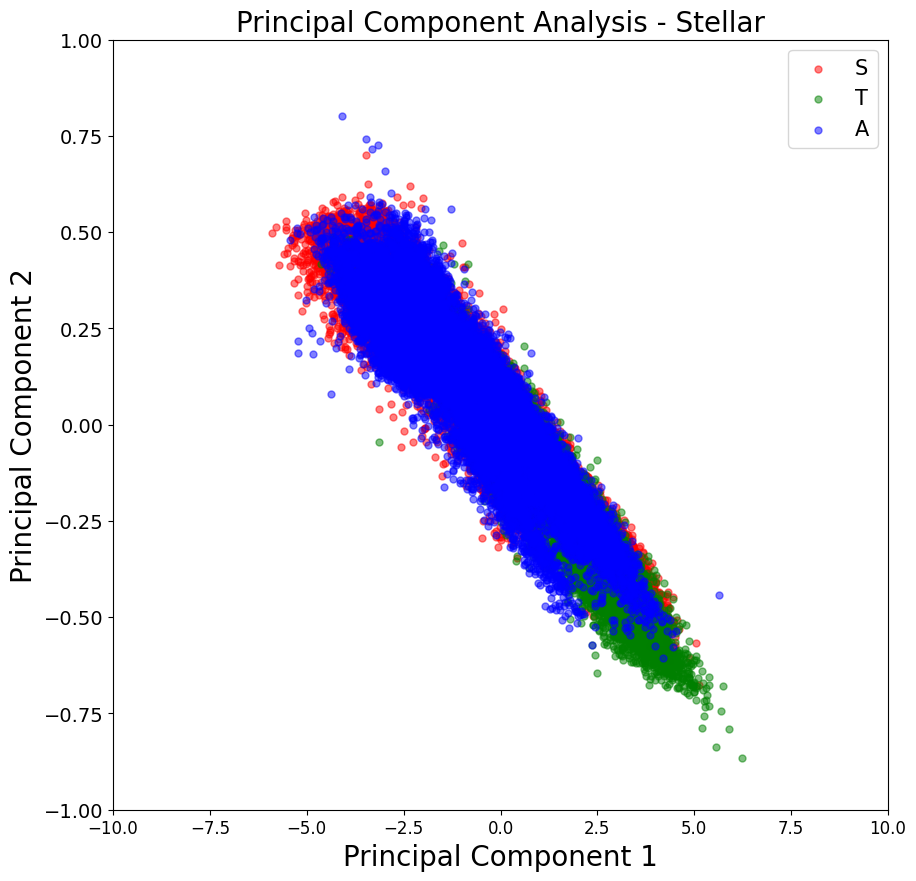

In [19]:
plt.Figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize=20)
plt.ylabel('Principal Component 2', fontsize=20)
plt.xlim(-10, 10)
plt.ylim(-1, 1)
plt.title("Principal Component Analysis - Stellar", fontsize=20)

targets = ['GALAXY', 'QSO', 'STAR']

colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    
    indices = ytrain == target
    
    plt.scatter(principal_componente_df.loc[indices, 'principal component 1'],
                principal_componente_df.loc[indices, 'principal component 2'],
                
                c = color, s = 25, alpha = 0.5)


plt.legend(target, prop = {'size': 15})

plt.show()
    
    


